## Adam vs Adashift: Logistic Regression on MNIST

In [1]:
import torch
from torch import nn

import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import savgol_filter

import adashift.optimizers as ad_opt

import torchvision
import torchvision.transforms as transforms
from torch.nn import functional as F

In [2]:
input_size = 784
num_classes = 10
num_epochs = 200
batch_size = 64

train_dataset = torchvision.datasets.MNIST(root='data', 
                                           train=True, 
                                           download=True,
                                           transform=transforms.Compose([
                                           transforms.ToTensor(),
                                           transforms.Normalize((0.1307,), (0.3081,))]))

test_dataset = torchvision.datasets.MNIST(root='data', 
                                          train=False, 
                                          transform=transforms.Compose([
                                           transforms.ToTensor(),
                                           transforms.Normalize((0.1307,), (0.3081,))]))

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)

In [3]:
import torch.nn as nn

device = torch.device('cuda')

model = nn.Linear(input_size, num_classes).to(device)

criterion = nn.CrossEntropyLoss()

In [4]:
def train(model, device, train_loader, optimizer, num_epochs, criterion, display_iter=1000):
    model.train()
    train_loss_hist = []
    test_acc_hist = []
    test_loss_hist = []
    
    test_loss, test_acc = test(model, device, test_loader, criterion)
    test_loss_hist.append(test_loss)
    test_acc_hist.append(test_acc)
    
    for epoch in range(num_epochs):  
        for batch_idx, (data, target) in enumerate(train_loader):
            data, target = data.to(device), target.to(device)
            optimizer.zero_grad()
            output = model(data.reshape(-1, 28*28))
            loss = criterion(output, target)
            train_loss_hist.append(loss.item())
            loss.backward()
            optimizer.step()
            
            if batch_idx % 100 == 0:
                test_loss, test_acc = test(model, device, test_loader, criterion)
                test_loss_hist.append(test_loss)
                test_acc_hist.append(test_acc)

            if batch_idx % display_iter == 0:
                print('Train Epoch: {} TrainLoss: {:.6f}'.format(
                    epoch, loss.item()))

                print('Test set:       TestLoss:  {:.4f}, Accuracy: {:.0f}%'.format(
                    test_loss_hist[-1], test_acc_hist[-1]))

    return train_loss_hist, test_loss_hist, test_acc_hist

def test(model, device, test_loader, criterion):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data.reshape(-1, 28*28))
            test_loss += criterion(output, target).item() # sum up batch loss
            pred = output.max(1, keepdim=True)[1] # get the index of the max log-probability
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)
    acc = 100. * correct / len(test_loader.dataset)
    return test_loss, acc

**Adam**

In [5]:
adam_optimizer = torch.optim.Adam(model.parameters(), lr=0.001,\
                             betas=(0.0, 0.999), eps=1e-8, weight_decay=0)

adam_train_loss_hist, adam_test_loss_hist, adam_test_acc_hist = \
                            train(model, device, train_loader, adam_optimizer, 200, criterion)                

Train Epoch: 0 TrainLoss: 2.370641
Test set:       TestLoss:  0.0363, Accuracy: 12%
Train Epoch: 1 TrainLoss: 0.376438
Test set:       TestLoss:  0.0047, Accuracy: 91%
Train Epoch: 2 TrainLoss: 0.105886
Test set:       TestLoss:  0.0044, Accuracy: 92%
Train Epoch: 3 TrainLoss: 0.256047
Test set:       TestLoss:  0.0044, Accuracy: 92%
Train Epoch: 4 TrainLoss: 0.118529
Test set:       TestLoss:  0.0044, Accuracy: 92%
Train Epoch: 5 TrainLoss: 0.173434
Test set:       TestLoss:  0.0043, Accuracy: 92%
Train Epoch: 6 TrainLoss: 0.244611
Test set:       TestLoss:  0.0043, Accuracy: 93%
Train Epoch: 7 TrainLoss: 0.367147
Test set:       TestLoss:  0.0043, Accuracy: 92%
Train Epoch: 8 TrainLoss: 0.077578
Test set:       TestLoss:  0.0044, Accuracy: 92%
Train Epoch: 9 TrainLoss: 0.241001
Test set:       TestLoss:  0.0044, Accuracy: 92%
Train Epoch: 10 TrainLoss: 0.176652
Test set:       TestLoss:  0.0045, Accuracy: 92%
Train Epoch: 11 TrainLoss: 0.113595
Test set:       TestLoss:  0.0043, Accu

Train Epoch: 97 TrainLoss: 0.299935
Test set:       TestLoss:  0.0048, Accuracy: 92%
Train Epoch: 98 TrainLoss: 0.343240
Test set:       TestLoss:  0.0049, Accuracy: 92%
Train Epoch: 99 TrainLoss: 0.264632
Test set:       TestLoss:  0.0051, Accuracy: 92%
Train Epoch: 100 TrainLoss: 0.246728
Test set:       TestLoss:  0.0050, Accuracy: 92%
Train Epoch: 101 TrainLoss: 0.134077
Test set:       TestLoss:  0.0050, Accuracy: 92%
Train Epoch: 102 TrainLoss: 0.289100
Test set:       TestLoss:  0.0048, Accuracy: 92%
Train Epoch: 103 TrainLoss: 0.486725
Test set:       TestLoss:  0.0049, Accuracy: 92%
Train Epoch: 104 TrainLoss: 0.326321
Test set:       TestLoss:  0.0048, Accuracy: 92%
Train Epoch: 105 TrainLoss: 0.175661
Test set:       TestLoss:  0.0048, Accuracy: 92%
Train Epoch: 106 TrainLoss: 0.176396
Test set:       TestLoss:  0.0049, Accuracy: 92%
Train Epoch: 107 TrainLoss: 0.264190
Test set:       TestLoss:  0.0048, Accuracy: 92%
Train Epoch: 108 TrainLoss: 0.126037
Test set:       Test

Train Epoch: 193 TrainLoss: 0.292161
Test set:       TestLoss:  0.0049, Accuracy: 92%
Train Epoch: 194 TrainLoss: 0.303120
Test set:       TestLoss:  0.0048, Accuracy: 92%
Train Epoch: 195 TrainLoss: 0.101983
Test set:       TestLoss:  0.0050, Accuracy: 92%
Train Epoch: 196 TrainLoss: 0.130307
Test set:       TestLoss:  0.0050, Accuracy: 92%
Train Epoch: 197 TrainLoss: 0.159877
Test set:       TestLoss:  0.0049, Accuracy: 92%
Train Epoch: 198 TrainLoss: 0.119842
Test set:       TestLoss:  0.0049, Accuracy: 92%
Train Epoch: 199 TrainLoss: 0.333390
Test set:       TestLoss:  0.0051, Accuracy: 92%


**AmsGrad**

In [11]:
model = nn.Linear(input_size, num_classes).cuda()

amsgrad_optimizer = torch.optim.Adam(model.parameters(), lr=1e-3,\
                             betas=(0.0, 0.999), eps=1e-8, weight_decay=0,amsgrad=True)

amsgrad_train_loss_hist, amsgrad_test_loss_hist, amsgrad_test_acc_hist = \
                            train(model, device, train_loader, amsgrad_optimizer, 200, criterion) 

Train Epoch: 0 TrainLoss: 2.584990
Test set:       TestLoss:  0.0386, Accuracy: 9%
Train Epoch: 1 TrainLoss: 0.416984
Test set:       TestLoss:  0.0048, Accuracy: 91%
Train Epoch: 2 TrainLoss: 0.290514
Test set:       TestLoss:  0.0043, Accuracy: 92%
Train Epoch: 3 TrainLoss: 0.360964
Test set:       TestLoss:  0.0044, Accuracy: 92%
Train Epoch: 4 TrainLoss: 0.369499
Test set:       TestLoss:  0.0043, Accuracy: 92%
Train Epoch: 5 TrainLoss: 0.152643
Test set:       TestLoss:  0.0044, Accuracy: 92%
Train Epoch: 6 TrainLoss: 0.115180
Test set:       TestLoss:  0.0045, Accuracy: 92%
Train Epoch: 7 TrainLoss: 0.318199
Test set:       TestLoss:  0.0044, Accuracy: 92%
Train Epoch: 8 TrainLoss: 0.338207
Test set:       TestLoss:  0.0044, Accuracy: 92%
Train Epoch: 9 TrainLoss: 0.312407
Test set:       TestLoss:  0.0043, Accuracy: 92%
Train Epoch: 10 TrainLoss: 0.275664
Test set:       TestLoss:  0.0044, Accuracy: 92%
Train Epoch: 11 TrainLoss: 0.181080
Test set:       TestLoss:  0.0044, Accur

Train Epoch: 97 TrainLoss: 0.503178
Test set:       TestLoss:  0.0047, Accuracy: 92%
Train Epoch: 98 TrainLoss: 0.086699
Test set:       TestLoss:  0.0048, Accuracy: 92%
Train Epoch: 99 TrainLoss: 0.281860
Test set:       TestLoss:  0.0048, Accuracy: 92%
Train Epoch: 100 TrainLoss: 0.228734
Test set:       TestLoss:  0.0047, Accuracy: 93%
Train Epoch: 101 TrainLoss: 0.293457
Test set:       TestLoss:  0.0047, Accuracy: 92%
Train Epoch: 102 TrainLoss: 0.146021
Test set:       TestLoss:  0.0048, Accuracy: 92%
Train Epoch: 103 TrainLoss: 0.178227
Test set:       TestLoss:  0.0048, Accuracy: 92%
Train Epoch: 104 TrainLoss: 0.058016
Test set:       TestLoss:  0.0047, Accuracy: 92%
Train Epoch: 105 TrainLoss: 0.113282
Test set:       TestLoss:  0.0047, Accuracy: 92%
Train Epoch: 106 TrainLoss: 0.248758
Test set:       TestLoss:  0.0048, Accuracy: 92%
Train Epoch: 107 TrainLoss: 0.133275
Test set:       TestLoss:  0.0048, Accuracy: 92%
Train Epoch: 108 TrainLoss: 0.274197
Test set:       Test

Train Epoch: 193 TrainLoss: 0.304507
Test set:       TestLoss:  0.0049, Accuracy: 92%
Train Epoch: 194 TrainLoss: 0.209629
Test set:       TestLoss:  0.0050, Accuracy: 92%
Train Epoch: 195 TrainLoss: 0.308121
Test set:       TestLoss:  0.0049, Accuracy: 92%
Train Epoch: 196 TrainLoss: 0.292312
Test set:       TestLoss:  0.0049, Accuracy: 92%
Train Epoch: 197 TrainLoss: 0.227889
Test set:       TestLoss:  0.0049, Accuracy: 92%
Train Epoch: 198 TrainLoss: 0.153461
Test set:       TestLoss:  0.0048, Accuracy: 92%
Train Epoch: 199 TrainLoss: 0.370496
Test set:       TestLoss:  0.0048, Accuracy: 92%


**max-Adashift**

In [12]:
model = nn.Linear(input_size, num_classes).cuda()

adashift_optimizer = ad_opt.AdaShift(model.parameters(), lr=1e-2,\
                             betas=(0.0, 0.999), eps=1e-8)

adashift_train_loss_hist, adashift_test_loss_hist, adashift_test_acc_hist = \
                            train(model, device, train_loader, adashift_optimizer, 200, criterion) 

Train Epoch: 0 TrainLoss: 2.499734
Test set:       TestLoss:  0.0379, Accuracy: 12%
Train Epoch: 1 TrainLoss: 0.440241
Test set:       TestLoss:  0.0050, Accuracy: 91%
Train Epoch: 2 TrainLoss: 0.190983
Test set:       TestLoss:  0.0049, Accuracy: 91%
Train Epoch: 3 TrainLoss: 0.394425
Test set:       TestLoss:  0.0047, Accuracy: 92%
Train Epoch: 4 TrainLoss: 0.332437
Test set:       TestLoss:  0.0047, Accuracy: 92%
Train Epoch: 5 TrainLoss: 0.396494
Test set:       TestLoss:  0.0047, Accuracy: 92%
Train Epoch: 6 TrainLoss: 0.352368
Test set:       TestLoss:  0.0047, Accuracy: 92%
Train Epoch: 7 TrainLoss: 0.351560
Test set:       TestLoss:  0.0047, Accuracy: 92%
Train Epoch: 8 TrainLoss: 0.439186
Test set:       TestLoss:  0.0048, Accuracy: 92%
Train Epoch: 9 TrainLoss: 0.373624
Test set:       TestLoss:  0.0054, Accuracy: 90%
Train Epoch: 10 TrainLoss: 0.423575
Test set:       TestLoss:  0.0051, Accuracy: 91%
Train Epoch: 11 TrainLoss: 0.363977
Test set:       TestLoss:  0.0048, Accu

Train Epoch: 97 TrainLoss: 0.440182
Test set:       TestLoss:  0.0052, Accuracy: 91%
Train Epoch: 98 TrainLoss: 0.341581
Test set:       TestLoss:  0.0051, Accuracy: 92%
Train Epoch: 99 TrainLoss: 0.311707
Test set:       TestLoss:  0.0049, Accuracy: 92%
Train Epoch: 100 TrainLoss: 0.351418
Test set:       TestLoss:  0.0051, Accuracy: 92%
Train Epoch: 101 TrainLoss: 0.461034
Test set:       TestLoss:  0.0050, Accuracy: 92%
Train Epoch: 102 TrainLoss: 0.338510
Test set:       TestLoss:  0.0053, Accuracy: 91%
Train Epoch: 103 TrainLoss: 0.236560
Test set:       TestLoss:  0.0052, Accuracy: 92%
Train Epoch: 104 TrainLoss: 0.178152
Test set:       TestLoss:  0.0052, Accuracy: 92%
Train Epoch: 105 TrainLoss: 0.556368
Test set:       TestLoss:  0.0053, Accuracy: 91%
Train Epoch: 106 TrainLoss: 0.352233
Test set:       TestLoss:  0.0052, Accuracy: 92%
Train Epoch: 107 TrainLoss: 0.295212
Test set:       TestLoss:  0.0051, Accuracy: 92%
Train Epoch: 108 TrainLoss: 0.276617
Test set:       Test

Train Epoch: 193 TrainLoss: 0.074569
Test set:       TestLoss:  0.0053, Accuracy: 92%
Train Epoch: 194 TrainLoss: 0.464039
Test set:       TestLoss:  0.0054, Accuracy: 91%
Train Epoch: 195 TrainLoss: 0.410383
Test set:       TestLoss:  0.0052, Accuracy: 92%
Train Epoch: 196 TrainLoss: 0.168635
Test set:       TestLoss:  0.0055, Accuracy: 91%
Train Epoch: 197 TrainLoss: 0.145779
Test set:       TestLoss:  0.0053, Accuracy: 91%
Train Epoch: 198 TrainLoss: 0.236936
Test set:       TestLoss:  0.0054, Accuracy: 91%
Train Epoch: 199 TrainLoss: 0.526937
Test set:       TestLoss:  0.0053, Accuracy: 91%


**non-Adashift**

In [13]:
model = nn.Linear(input_size, num_classes).cuda()

non_adashift_optimizer = ad_opt.AdaShift(model.parameters(), lr=1e-3,\
                             betas=(0.0, 0.999), eps=1e-8, reduce_func=lambda x: x)

non_adashift_train_loss_hist, non_adashift_test_loss_hist, non_adashift_test_acc_hist = \
                            train(model, device, train_loader, non_adashift_optimizer, 200, criterion) 

Train Epoch: 0 TrainLoss: 2.446443
Test set:       TestLoss:  0.0389, Accuracy: 13%
Train Epoch: 1 TrainLoss: 0.396805
Test set:       TestLoss:  0.0047, Accuracy: 91%
Train Epoch: 2 TrainLoss: 0.375551
Test set:       TestLoss:  0.0044, Accuracy: 92%
Train Epoch: 3 TrainLoss: 0.213632
Test set:       TestLoss:  0.0044, Accuracy: 92%
Train Epoch: 4 TrainLoss: 0.304882
Test set:       TestLoss:  0.0046, Accuracy: 92%
Train Epoch: 5 TrainLoss: 0.215098
Test set:       TestLoss:  0.0045, Accuracy: 92%
Train Epoch: 6 TrainLoss: 0.323399
Test set:       TestLoss:  0.0044, Accuracy: 92%
Train Epoch: 7 TrainLoss: 0.320518
Test set:       TestLoss:  0.0044, Accuracy: 92%
Train Epoch: 8 TrainLoss: 0.324746
Test set:       TestLoss:  0.0043, Accuracy: 92%
Train Epoch: 9 TrainLoss: 0.154173
Test set:       TestLoss:  0.0043, Accuracy: 93%
Train Epoch: 10 TrainLoss: 0.231338
Test set:       TestLoss:  0.0046, Accuracy: 92%
Train Epoch: 11 TrainLoss: 0.152749
Test set:       TestLoss:  0.0045, Accu

Train Epoch: 97 TrainLoss: 0.121205
Test set:       TestLoss:  0.0047, Accuracy: 92%
Train Epoch: 98 TrainLoss: 0.332377
Test set:       TestLoss:  0.0049, Accuracy: 92%
Train Epoch: 99 TrainLoss: 0.245762
Test set:       TestLoss:  0.0054, Accuracy: 91%
Train Epoch: 100 TrainLoss: 0.351656
Test set:       TestLoss:  0.0048, Accuracy: 92%
Train Epoch: 101 TrainLoss: 0.159344
Test set:       TestLoss:  0.0047, Accuracy: 92%
Train Epoch: 102 TrainLoss: 0.530526
Test set:       TestLoss:  0.0049, Accuracy: 92%
Train Epoch: 103 TrainLoss: 0.215444
Test set:       TestLoss:  0.0047, Accuracy: 92%
Train Epoch: 104 TrainLoss: 0.092804
Test set:       TestLoss:  0.0048, Accuracy: 92%
Train Epoch: 105 TrainLoss: 0.146949
Test set:       TestLoss:  0.0049, Accuracy: 92%
Train Epoch: 106 TrainLoss: 0.065570
Test set:       TestLoss:  0.0049, Accuracy: 92%
Train Epoch: 107 TrainLoss: 0.128797
Test set:       TestLoss:  0.0049, Accuracy: 92%
Train Epoch: 108 TrainLoss: 0.586299
Test set:       Test

Train Epoch: 193 TrainLoss: 0.315415
Test set:       TestLoss:  0.0049, Accuracy: 92%
Train Epoch: 194 TrainLoss: 0.282390
Test set:       TestLoss:  0.0049, Accuracy: 92%
Train Epoch: 195 TrainLoss: 0.128588
Test set:       TestLoss:  0.0050, Accuracy: 92%
Train Epoch: 196 TrainLoss: 0.246796
Test set:       TestLoss:  0.0051, Accuracy: 92%
Train Epoch: 197 TrainLoss: 0.294525
Test set:       TestLoss:  0.0050, Accuracy: 92%
Train Epoch: 198 TrainLoss: 0.264850
Test set:       TestLoss:  0.0050, Accuracy: 92%
Train Epoch: 199 TrainLoss: 0.152123
Test set:       TestLoss:  0.0050, Accuracy: 92%


In [14]:
def save_as_npy(name, array):
    np_array = np.array([i for i in array]) 
    np.save('logs/log_reg/' + name, np_array)
    return np_array

In [16]:
!mkdir logs

In [17]:
!mkdir logs/log_reg

In [18]:
adam_train_loss_hist = save_as_npy('adam_train_loss_hist', adam_train_loss_hist)
amsgrad_train_loss_hist = save_as_npy('amsgrad_train_loss_hist', amsgrad_train_loss_hist)
adashift_train_loss_hist = save_as_npy('adashift_train_loss_hist', adashift_train_loss_hist)
non_adashift_train_loss_hist = save_as_npy('non_adashift_train_loss_hist', non_adashift_train_loss_hist)

adam_test_loss_hist = save_as_npy('adam_test_loss_hist', adam_test_loss_hist)
amsgrad_test_loss_hist = save_as_npy('amsgrad_test_loss_hist', amsgrad_test_loss_hist)
adashift_test_loss_hist = save_as_npy('adashift_test_loss_hist', adashift_test_loss_hist)
non_adashift_test_loss_hist = save_as_npy('non_adashift_test_loss_hist', non_adashift_test_loss_hist)

adam_test_acc_hist = save_as_npy('adam_test_acc_hist', adam_test_acc_hist)
amsgrad_test_acc_hist = save_as_npy('amsgrad_test_acc_hist', amsgrad_test_acc_hist)
adashift_test_acc_hist = save_as_npy('adashift_test_acc_hist', adashift_test_acc_hist)
non_adashift_test_acc_hist = save_as_npy('non_adashift_test_acc_hist', non_adashift_test_acc_hist)

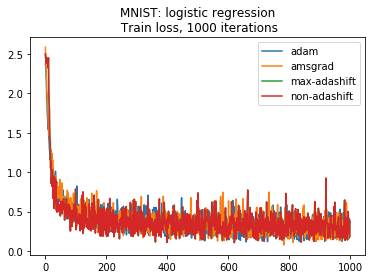

In [19]:
plt.title("MNIST: logistic regression\n Train loss, 1000 iterations")
#np.linspace(0, 1000000, 100),0
plt.plot(adam_train_loss_hist[:1000], label="adam")
plt.plot(amsgrad_train_loss_hist[:1000], label="amsgrad")
plt.plot(adashift_train_loss_hist[:1000], label="max-adashift")
plt.plot(adashift_train_loss_hist[:1000], label="non-adashift")

plt.legend(loc='best')
plt.show()

In [20]:
def smooth(y,box_size,smooth_start=0):
    # borrowed from authors code
    y_hat=np.zeros(y.shape,dtype=y.dtype)
    y_hat[0:smooth_start]=y[0:smooth_start]
    for i in range(smooth_start,y.size):
        if i < smooth_start+box_size//2:
            y_hat[i]=np.mean(y[smooth_start:i+box_size//2])
        elif i<y.size-box_size//2:
            y_hat[i]=np.mean(y[i-box_size//2:i+box_size//2])
        else:
            y_hat[i]=np.mean(y[i-box_size//2:])
    return y_hat

In [21]:
smooth_size=1000
smooth_start_train_loss=3
issmooth=1

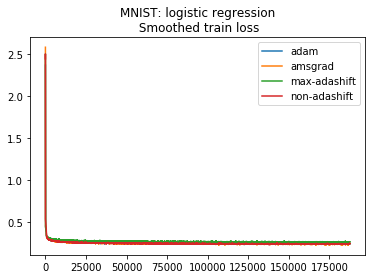

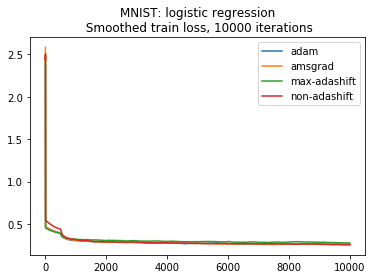

In [22]:
plt.title("MNIST: logistic regression\n Smoothed train loss")
plt.plot(smooth(adam_train_loss_hist, smooth_size, smooth_start_train_loss), label="adam")
plt.plot(smooth(amsgrad_train_loss_hist, smooth_size, smooth_start_train_loss), label="amsgrad")
plt.plot(smooth(adashift_train_loss_hist, smooth_size, smooth_start_train_loss), label="max-adashift")
plt.plot(smooth(non_adashift_train_loss_hist, smooth_size, smooth_start_train_loss), label="non-adashift")

plt.legend(loc='best')
plt.show()

plt.title("MNIST: logistic regression\n Smoothed train loss, 10000 iterations")

plt.plot(smooth(adam_train_loss_hist[:10000], smooth_size, smooth_start_train_loss), label="adam")
plt.plot(smooth(amsgrad_train_loss_hist[:10000], smooth_size, smooth_start_train_loss), label="amsgrad")
plt.plot(smooth(adashift_train_loss_hist[:10000], smooth_size, smooth_start_train_loss), label="max-adashift")
plt.plot(smooth(non_adashift_train_loss_hist[:10000], smooth_size, smooth_start_train_loss), label="non-adashift")

plt.legend(loc='best')
plt.show()

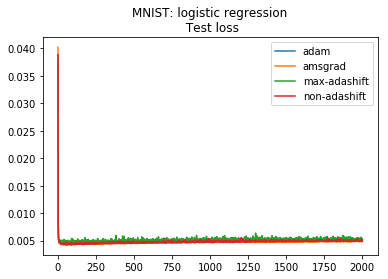

In [25]:
plt.title("MNIST: logistic regression\n Test loss")
plt.plot(adam_test_loss_hist, label="adam")
plt.plot(amsgrad_test_loss_hist, label="amsgrad")
plt.plot(adashift_test_loss_hist, label="max-adashift")
plt.plot(non_adashift_test_loss_hist, label="non-adashift")

plt.legend(loc='best')
plt.show()

## MLP

In [26]:
import torch
from torch import nn
import matplotlib.pyplot as plt
import numpy as np

In [27]:
class MultiLayerPerceptron(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(MultiLayerPerceptron, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size) 
        self.fc2 = nn.Linear(hidden_size, hidden_size)  
        self.fc3 = nn.Linear(hidden_size, num_classes) 
        
        with torch.no_grad():
            for p in self.parameters():
                p.data = torch.tensor(np.random.randn(*p.shape).astype(np.float32))
    
    def forward(self, x):
        out = self.fc1(x)
        out = self.fc2(out)
        out = self.fc3(out)
#         return F.log_softmax(out, dim=1)
        return out

In [28]:
hidden_size = 256
criterion = nn.CrossEntropyLoss()

In [29]:
model = MultiLayerPerceptron(input_size, hidden_size, num_classes).to(device)

adam_optimizer = torch.optim.Adam(model.parameters(), lr=0.001,\
                             betas=(0.0, 0.999), eps=1e-8, weight_decay=0)

adam_train_loss_hist_mlp, adam_test_loss_hist_mlp, adam_test_acc_hist_mlp = \
                            train(model, device, train_loader, adam_optimizer, 60, criterion)                

Train Epoch: 0 TrainLoss: 9282.625000
Test set:       TestLoss:  150.0419, Accuracy: 12%
Train Epoch: 1 TrainLoss: 175.693329
Test set:       TestLoss:  5.1737, Accuracy: 87%
Train Epoch: 2 TrainLoss: 177.076324
Test set:       TestLoss:  3.5707, Accuracy: 88%
Train Epoch: 3 TrainLoss: 103.435448
Test set:       TestLoss:  3.0825, Accuracy: 88%
Train Epoch: 4 TrainLoss: 353.926147
Test set:       TestLoss:  3.3267, Accuracy: 84%
Train Epoch: 5 TrainLoss: 236.367554
Test set:       TestLoss:  2.1898, Accuracy: 89%
Train Epoch: 6 TrainLoss: 62.611526
Test set:       TestLoss:  2.2483, Accuracy: 89%
Train Epoch: 7 TrainLoss: 110.165482
Test set:       TestLoss:  2.0490, Accuracy: 87%
Train Epoch: 8 TrainLoss: 208.403793
Test set:       TestLoss:  1.9029, Accuracy: 88%
Train Epoch: 9 TrainLoss: 81.418724
Test set:       TestLoss:  1.8813, Accuracy: 87%
Train Epoch: 10 TrainLoss: 98.635101
Test set:       TestLoss:  1.4239, Accuracy: 88%
Train Epoch: 11 TrainLoss: 78.170143
Test set:       

In [30]:
model = MultiLayerPerceptron(input_size, hidden_size, num_classes).to(device)

amsgrad_optimizer = torch.optim.Adam(model.parameters(), lr=1e-3,\
                             betas=(0.0, 0.999), eps=1e-8, weight_decay=0,amsgrad=True)

amsgrad_train_loss_hist_mlp, amsgrad_test_loss_hist_mlp, amsgrad_test_acc_hist_mlp = \
                            train(model, device, train_loader, amsgrad_optimizer, 60, criterion)               

Train Epoch: 0 TrainLoss: 9569.240234
Test set:       TestLoss:  152.6508, Accuracy: 10%
Train Epoch: 1 TrainLoss: 201.219910
Test set:       TestLoss:  4.8629, Accuracy: 88%
Train Epoch: 2 TrainLoss: 148.271606
Test set:       TestLoss:  3.5214, Accuracy: 88%
Train Epoch: 3 TrainLoss: 76.363708
Test set:       TestLoss:  2.8082, Accuracy: 89%
Train Epoch: 4 TrainLoss: 33.114208
Test set:       TestLoss:  2.4227, Accuracy: 89%
Train Epoch: 5 TrainLoss: 116.542603
Test set:       TestLoss:  2.9434, Accuracy: 84%
Train Epoch: 6 TrainLoss: 187.418304
Test set:       TestLoss:  1.9397, Accuracy: 88%
Train Epoch: 7 TrainLoss: 199.549057
Test set:       TestLoss:  1.7942, Accuracy: 88%
Train Epoch: 8 TrainLoss: 100.521103
Test set:       TestLoss:  1.7182, Accuracy: 87%
Train Epoch: 9 TrainLoss: 139.454010
Test set:       TestLoss:  1.6390, Accuracy: 87%
Train Epoch: 10 TrainLoss: 34.388718
Test set:       TestLoss:  1.2846, Accuracy: 89%
Train Epoch: 11 TrainLoss: 72.319824
Test set:       

In [31]:
from adashift.optimizers import AdaShift

In [32]:
model = MultiLayerPerceptron(input_size, hidden_size, num_classes).to(device)

adashift_optimizer = AdaShift(model.parameters(), lr=1e-2,\
                             betas=(0.0, 0.999), eps=1e-8)

adashift_train_loss_hist_mlp, adashift_test_loss_hist_mlp, adashift_test_acc_hist_mlp = \
                            train(model, device, train_loader, adashift_optimizer, 60, criterion) 

Train Epoch: 0 TrainLoss: 13722.039062
Test set:       TestLoss:  199.6622, Accuracy: 13%
Train Epoch: 1 TrainLoss: 816.522522
Test set:       TestLoss:  6.8390, Accuracy: 84%
Train Epoch: 2 TrainLoss: 518.187378
Test set:       TestLoss:  3.7653, Accuracy: 88%
Train Epoch: 3 TrainLoss: 299.091827
Test set:       TestLoss:  3.2850, Accuracy: 88%
Train Epoch: 4 TrainLoss: 260.319092
Test set:       TestLoss:  2.5162, Accuracy: 89%
Train Epoch: 5 TrainLoss: 224.633453
Test set:       TestLoss:  2.2455, Accuracy: 88%
Train Epoch: 6 TrainLoss: 170.510712
Test set:       TestLoss:  2.1403, Accuracy: 88%
Train Epoch: 7 TrainLoss: 205.079071
Test set:       TestLoss:  1.9361, Accuracy: 87%
Train Epoch: 8 TrainLoss: 176.889511
Test set:       TestLoss:  1.6857, Accuracy: 89%
Train Epoch: 9 TrainLoss: 128.485687
Test set:       TestLoss:  1.7550, Accuracy: 87%
Train Epoch: 10 TrainLoss: 74.645721
Test set:       TestLoss:  1.6287, Accuracy: 87%
Train Epoch: 11 TrainLoss: 105.133560
Test set:   

In [33]:
model = MultiLayerPerceptron(input_size, hidden_size, num_classes).to(device)

amsgrad_optimizer = torch.optim.Adam(model.parameters(), lr=1e-3,\
                             betas=(0.0, 0.999), eps=1e-8, weight_decay=0,amsgrad=True)

amsgrad_train_loss_hist_mlp, amsgrad_test_loss_hist_mlp, amsgrad_test_acc_hist_mlp =\
        train(model, device, train_loader, amsgrad_optimizer, 60, criterion)               

Train Epoch: 0 TrainLoss: 9842.507812
Test set:       TestLoss:  158.9043, Accuracy: 11%
Train Epoch: 1 TrainLoss: 628.418335
Test set:       TestLoss:  5.1578, Accuracy: 86%
Train Epoch: 2 TrainLoss: 168.532852
Test set:       TestLoss:  3.6354, Accuracy: 88%
Train Epoch: 3 TrainLoss: 125.781944
Test set:       TestLoss:  3.3001, Accuracy: 87%
Train Epoch: 4 TrainLoss: 334.388611
Test set:       TestLoss:  2.5089, Accuracy: 88%
Train Epoch: 5 TrainLoss: 31.437489
Test set:       TestLoss:  2.2915, Accuracy: 88%
Train Epoch: 6 TrainLoss: 3.106178
Test set:       TestLoss:  1.9409, Accuracy: 88%
Train Epoch: 7 TrainLoss: 95.351982
Test set:       TestLoss:  1.5995, Accuracy: 89%
Train Epoch: 8 TrainLoss: 63.331898
Test set:       TestLoss:  1.7858, Accuracy: 85%
Train Epoch: 9 TrainLoss: 13.256721
Test set:       TestLoss:  1.4145, Accuracy: 89%
Train Epoch: 10 TrainLoss: 22.654444
Test set:       TestLoss:  1.4296, Accuracy: 88%
Train Epoch: 11 TrainLoss: 70.919228
Test set:       Test

In [34]:
model = MultiLayerPerceptron(input_size, hidden_size, num_classes).to(device)

non_adashift_optimizer = AdaShift(model.parameters(), lr=1e-3,\
                             betas=(0.0, 0.999), eps=1e-8, reduce_func=lambda x: x)

non_adashift_train_loss_hist_mlp, non_adashift_test_loss_hist_mlp, non_adashift_test_acc_hist_mlp = \
                            train(model, device, train_loader, non_adashift_optimizer, 60, criterion) 

Train Epoch: 0 TrainLoss: 7783.211914
Test set:       TestLoss:  137.8631, Accuracy: 9%
Train Epoch: 1 TrainLoss: 2337.867920
Test set:       TestLoss:  13.2722, Accuracy: 85%
Train Epoch: 2 TrainLoss: 624.150879
Test set:       TestLoss:  9.5690, Accuracy: 86%
Train Epoch: 3 TrainLoss: 655.339111
Test set:       TestLoss:  7.1851, Accuracy: 89%
Train Epoch: 4 TrainLoss: 729.252136
Test set:       TestLoss:  10.0440, Accuracy: 86%
Train Epoch: 5 TrainLoss: 338.696655
Test set:       TestLoss:  5.9562, Accuracy: 89%
Train Epoch: 6 TrainLoss: 156.896271
Test set:       TestLoss:  5.1234, Accuracy: 89%
Train Epoch: 7 TrainLoss: 255.460480
Test set:       TestLoss:  5.4873, Accuracy: 89%
Train Epoch: 8 TrainLoss: 85.317139
Test set:       TestLoss:  5.5212, Accuracy: 88%
Train Epoch: 9 TrainLoss: 383.557404
Test set:       TestLoss:  4.5993, Accuracy: 88%
Train Epoch: 10 TrainLoss: 364.139282
Test set:       TestLoss:  4.2647, Accuracy: 89%
Train Epoch: 11 TrainLoss: 426.248962
Test set:  

In [35]:
adam_train_loss_hist_mlp = save_as_npy('adam_train_loss_hist_mlp', adam_train_loss_hist_mlp)
amsgrad_train_loss_hist_mlp = save_as_npy('amsgrad_train_loss_hist_mlp', amsgrad_train_loss_hist_mlp)
adashift_train_loss_hist_mlp = save_as_npy('adashift_train_loss_hist_mlp', adashift_train_loss_hist_mlp)
non_adashift_train_loss_hist_mlp = save_as_npy('non_adashift_train_loss_hist_mlp', non_adashift_train_loss_hist_mlp)

adam_test_loss_hist_mlp = save_as_npy('adam_test_loss_hist_mlp', adam_test_loss_hist_mlp)
amsgrad_test_loss_hist_mlp = save_as_npy('amsgrad_test_loss_hist_mlp', amsgrad_test_loss_hist_mlp)
adashift_test_loss_hist_mlp = save_as_npy('adashift_test_loss_hist_mlp', adashift_test_loss_hist_mlp)
non_adashift_test_loss_hist_mlp = save_as_npy('non_adashift_test_loss_hist_mlp', non_adashift_test_loss_hist_mlp)

adam_test_acc_hist_mlp = save_as_npy('adam_test_acc_hist_mlp', adam_test_acc_hist_mlp)
amsgrad_test_acc_hist_mlp = save_as_npy('amsgrad_test_acc_hist_mlp', amsgrad_test_acc_hist_mlp)
adashift_test_acc_hist_mlp = save_as_npy('adashift_test_acc_hist_mlp', adashift_test_acc_hist_mlp)
non_adashift_test_acc_hist_mlp = save_as_npy('non_adashift_test_acc_hist_mlp', non_adashift_test_acc_hist_mlp)

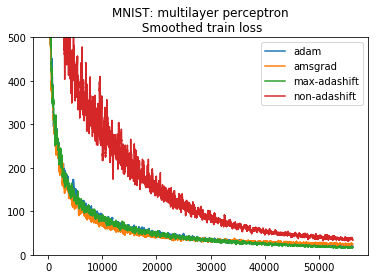

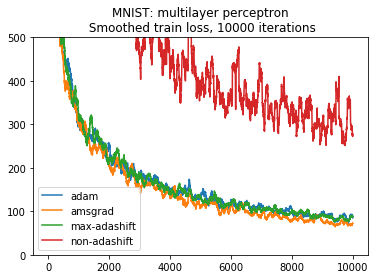

In [36]:
smooth_size = 100
plt.title("MNIST: multilayer perceptron\n Smoothed train loss")
plt.plot(smooth(adam_train_loss_hist_mlp, smooth_size, smooth_start_train_loss), label="adam")
plt.plot(smooth(amsgrad_train_loss_hist_mlp, smooth_size, smooth_start_train_loss), label="amsgrad")
plt.plot(smooth(adashift_train_loss_hist_mlp, smooth_size, smooth_start_train_loss), label="max-adashift")
plt.plot(smooth(non_adashift_train_loss_hist_mlp, smooth_size, smooth_start_train_loss), label="non-adashift")
plt.ylim((0, 500))

plt.legend(loc='best')
plt.show()

plt.title("MNIST: multilayer perceptron\n Smoothed train loss, 10000 iterations")

plt.plot(smooth(adam_train_loss_hist_mlp[:10000], smooth_size, smooth_start_train_loss), label="adam")
plt.plot(smooth(amsgrad_train_loss_hist_mlp[:10000], smooth_size, smooth_start_train_loss), label="amsgrad")
plt.plot(smooth(adashift_train_loss_hist_mlp[:10000], smooth_size, smooth_start_train_loss), label="max-adashift")
plt.plot(smooth(non_adashift_train_loss_hist_mlp[:10000], smooth_size, smooth_start_train_loss), label="non-adashift")
plt.ylim((0, 500))

plt.legend(loc='best')
plt.show()

/home/isaparina/pytorch0.4/lib/python3.5/site-packages/matplotlib/pyplot.py:1479: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_ylim(*args, **kwargs)


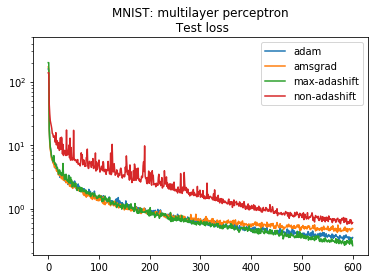

In [37]:
plt.title("MNIST: multilayer perceptron\n Test loss")
plt.semilogy(adam_test_loss_hist_mlp, label="adam")
plt.semilogy(amsgrad_test_loss_hist_mlp, label="amsgrad")
plt.semilogy(adashift_test_loss_hist_mlp, label="max-adashift")
plt.semilogy(non_adashift_test_loss_hist_mlp, label="non-adashift")
plt.ylim((0, 500))

plt.legend(loc='best')
plt.show()

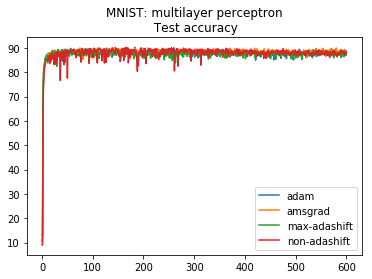

In [38]:
plt.title("MNIST: multilayer perceptron\n Test accuracy")
plt.plot(adam_test_acc_hist_mlp, label="adam")
plt.plot(amsgrad_test_acc_hist_mlp, label="amsgrad")
plt.plot(adashift_test_acc_hist_mlp, label="max-adashift")
plt.plot(non_adashift_test_acc_hist_mlp, label="non-adashift")

plt.legend(loc='best')
plt.show()

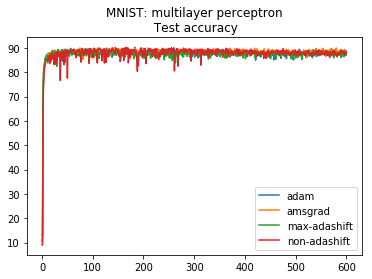

In [39]:
plt.title("MNIST: multilayer perceptron\n Test accuracy")
plt.plot(adam_test_acc_hist_mlp, label="adam")
plt.plot(amsgrad_test_acc_hist_mlp, label="amsgrad")
plt.plot(adashift_test_acc_hist_mlp, label="max-adashift")
plt.plot(non_adashift_test_acc_hist_mlp, label="non-adashift")

plt.legend(loc='best')
plt.show()